<a href="https://colab.research.google.com/github/gargishita/House_Price_Predictor/blob/main/House_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(30,10)

In [99]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [100]:
df1.shape

(13320, 9)

In [101]:
df1.groupby('area_type')["area_type"].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [102]:
df2=df1.drop(['area_type','society','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [103]:
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [104]:
df3 = df2.dropna(subset=["location"])
df3.isnull().sum()

,0
location,0
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [105]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [106]:
df3['BHK']=df3['size'].apply(lambda x:int(x.split(' ')[0]) if pd.notnull(x) else None)
df3.head()

<ipython-input-106-66215fa46c34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x:int(x.split(' ')[0]) if pd.notnull(x) else None)


,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [107]:
df3['bath'] = df3['bath'].fillna(df3['bath'].median())
df3['balcony'] = df3['balcony'].fillna(df3['balcony'].median())
df3['BHK']=df3['BHK'].fillna(df3['BHK'].median())
df3.isnull().sum()

<ipython-input-107-3e2f00e83c3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bath'] = df3['bath'].fillna(df3['bath'].median())
<ipython-input-107-3e2f00e83c3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['balcony'] = df3['balcony'].fillna(df3['balcony'].median())
<ipython-input-107-3e2f00e83c3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,0
location,0
size,16
total_sqft,0
bath,0
balcony,0
price,0
BHK,0


In [108]:
df4=df3.drop(['size'],axis='columns')
df4.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Kothanur,1200,2.0,1.0,51.00,2.0


In [109]:
df4['BHK'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [110]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [111]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [112]:
df4[~df4['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4.0
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4.0
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4.0
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2.0
...,...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3.0
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2.0
13240,Devanahalli,1020 - 1130,2.0,2.0,52.570,1.0
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2.0


In [113]:
def convert_sqft_to_num(x) :
  token = x.split('-')
  if len(token)==2 :
    return (float(token[0])+float(token[1]))/2
  try :
    return float(x)
  except:
    return None

In [114]:
df5=df4.copy()
df5['total_sqft']=df5['total_sqft'].apply(convert_sqft_to_num)
df5.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0


In [115]:
df6=df5.copy()
df6['price_per_sqft']=df6['price']*100000/df6['total_sqft']
df6.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [116]:
len(df6['location'].unique())

1305

In [117]:
print(df6.columns)


Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'BHK',
       'price_per_sqft'],
      dtype='object')


In [118]:
# Assuming df6 was originally a DataFrame
df6['location'] = df6['location'].apply(lambda x: x.strip())

# Then do the groupby operation
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)


In [119]:
location_stats

,location
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
sapthagiri Layout,1
sarjapura main road,1
kamanahalli main road,1


In [120]:
location_stats[location_stats<=10]

,location
location,
Gunjur Palya,10
Sadashiva Nagar,10
Basapura,10
Dodsworth Layout,10
1st Block Koramangala,10
...,...
sapthagiri Layout,1
sarjapura main road,1
kamanahalli main road,1


In [121]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Gunjur Palya,10
Sadashiva Nagar,10
Basapura,10
Dodsworth Layout,10
1st Block Koramangala,10
...,...
sapthagiri Layout,1
sarjapura main road,1
kamanahalli main road,1


In [122]:
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.location.unique())

242

In [123]:
df6.head(15)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2.0,3247.863248
6,Old Airport Road,2732.0,4.0,2.0,204.00,4.0,7467.057101
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4.0,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3.0,4828.244275
9,other,1020.0,6.0,2.0,370.00,6.0,36274.509804


In [124]:
df6[df6['total_sqft']/df6['BHK']<300].assign(sqft_per_bd =df6['total_sqft']/df6['BHK']).sort_values(by='sqft_per_bd',ascending=False).count()

,0
location,744
total_sqft,744
bath,744
balcony,744
price,744
BHK,744
price_per_sqft,744
sqft_per_bd,744


In [125]:
df6.shape

(13319, 7)

In [126]:
df7=df6[~(df6.total_sqft/df6.BHK<300)]
df7.shape

(12575, 7)

In [127]:
df7.price_per_sqft.describe()

,price_per_sqft
count,12529.000000
mean,6304.053504
std,4162.395819
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [128]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(10300, 7)

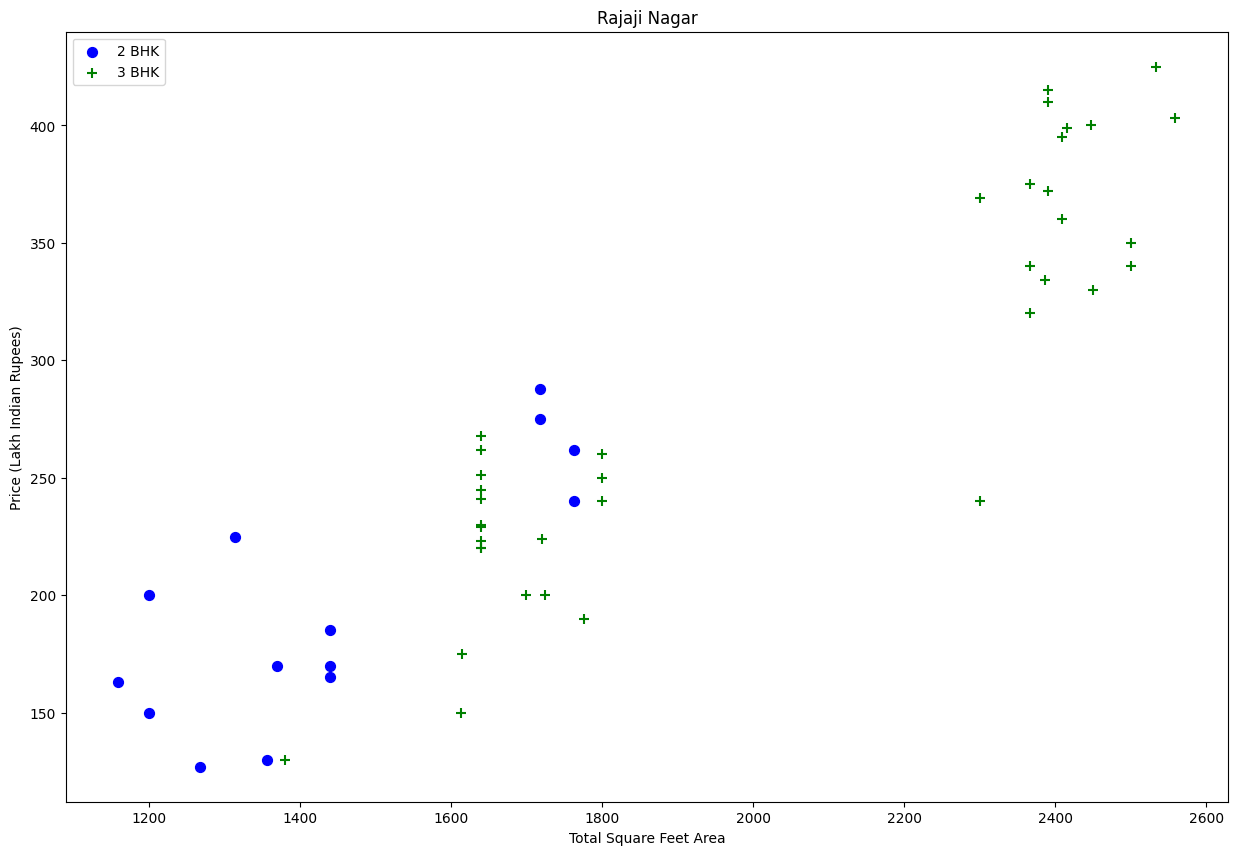

In [129]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df8,"Rajaji Nagar")

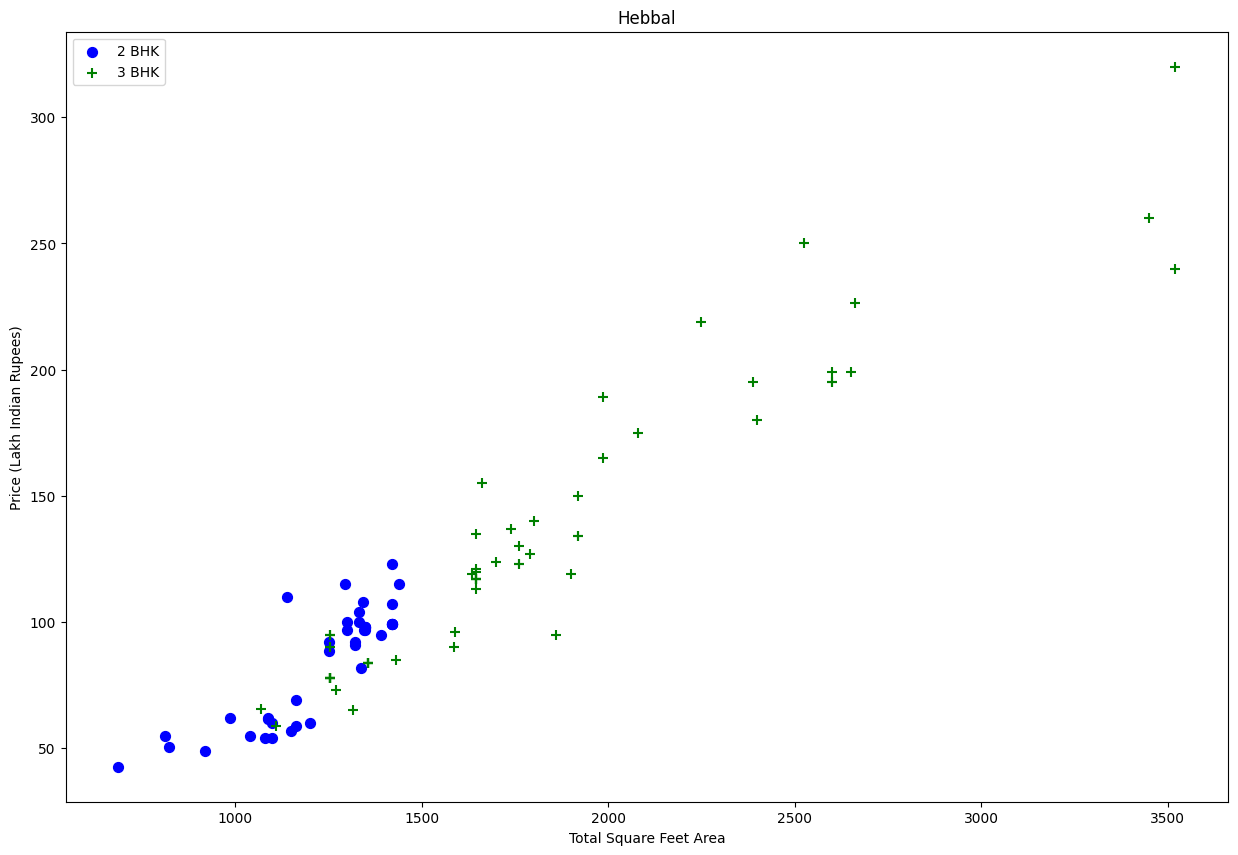

In [130]:
plot_scatter_chart(df8,"Hebbal")

In [131]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)
df9.shape

(7360, 7)

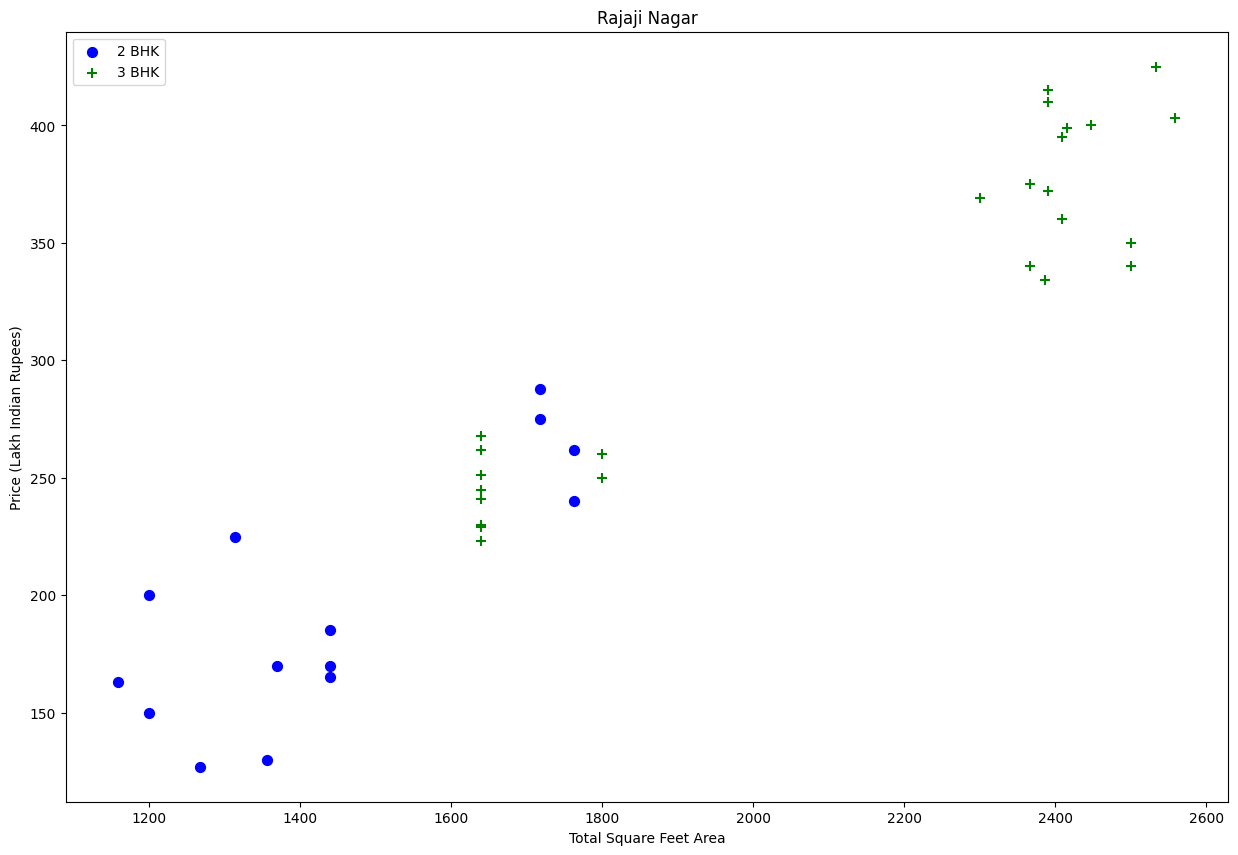

In [132]:
plot_scatter_chart(df9,"Rajaji Nagar")

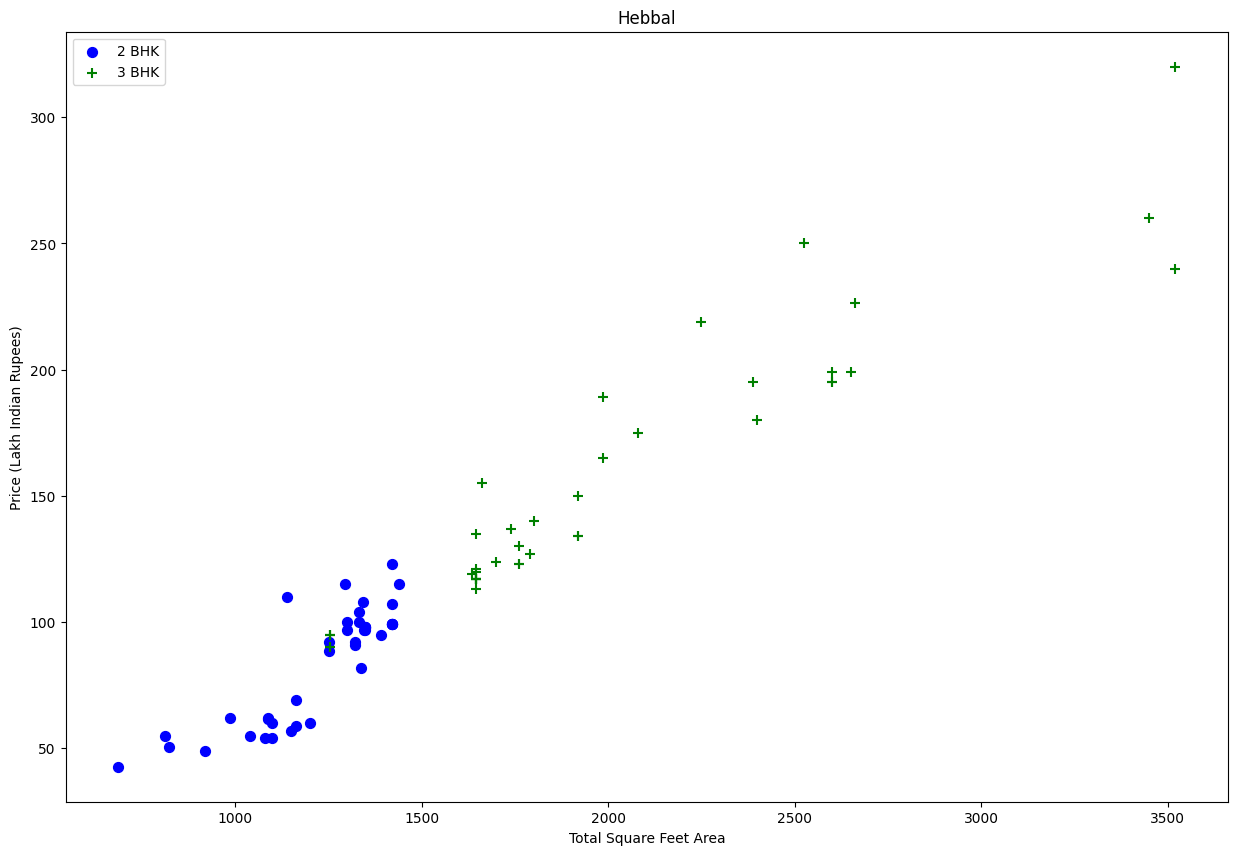

In [133]:
plot_scatter_chart(df9,"Hebbal")

Text(0, 0.5, 'Count')

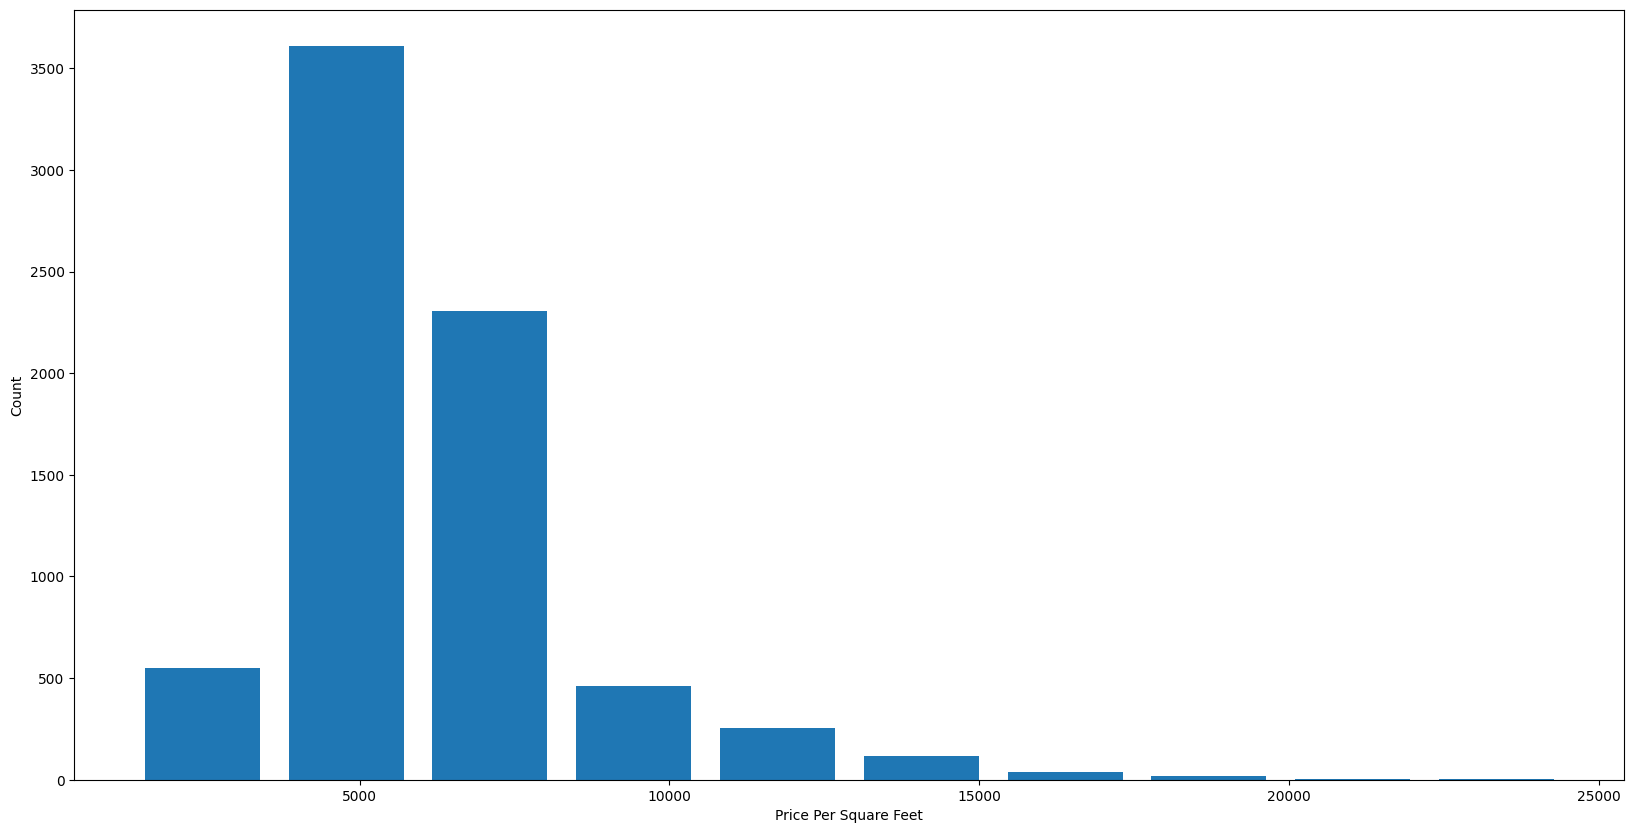

In [134]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [135]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

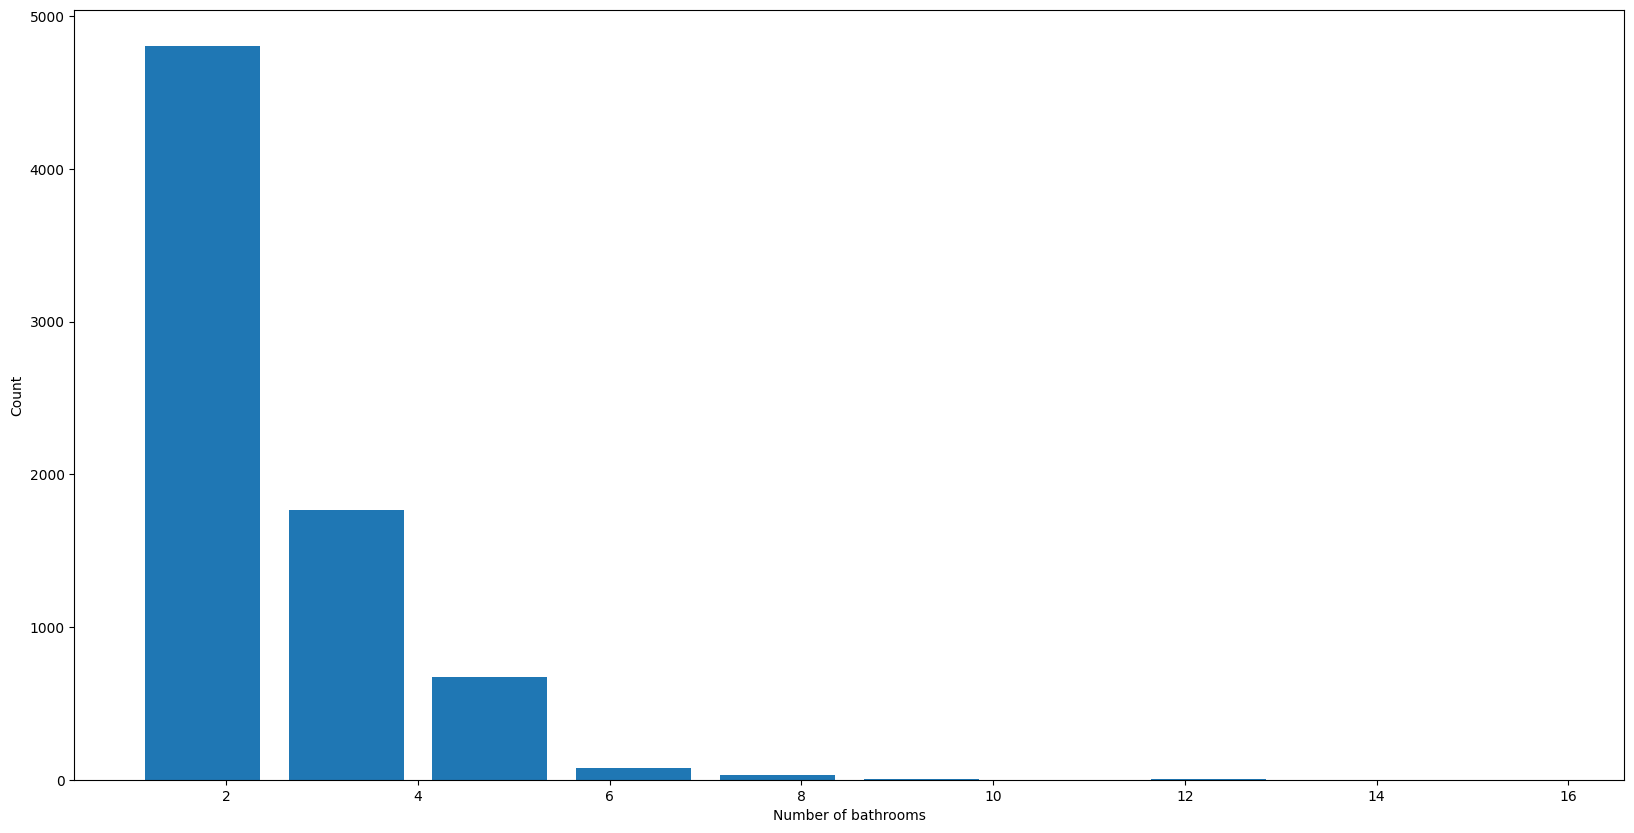

In [136]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [137]:
df9[df9.bath>10]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
5313,Neeladri Nagar,4000.0,12.0,2.0,160.0,10.0,4000.000000
8542,other,12000.0,12.0,2.0,525.0,10.0,4375.000000
8631,other,10000.0,16.0,2.0,550.0,16.0,5500.000000
9364,other,6000.0,12.0,2.0,150.0,11.0,2500.000000
9696,other,5425.0,13.0,0.0,275.0,13.0,5069.124424


In [138]:
df10 = df9[df9.bath<df9.BHK+2]
df10.shape

(7281, 7)

In [139]:
df10.head(2)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,11901.840491


In [140]:
df11 = df10.drop(['price_per_sqft'],axis='columns')
df11.head(3)

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0


In [142]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
